# Homework Set 1

Julius Wantenaar 11339055
Sebastiaan Bye 14084880

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

-----
# Exercise 1
This exercise is a variant of exercise 1.6 in the book.

## (a) 
Lookup the Taylor series for $\cos(x)$ in the base point $0$. (You don't have to hand in the series expansion)

$\cos(x) = 1 - \frac{x^{2}}{2!} + \frac{x^{4}}{4!} - \frac{x^{6}}{6!}$ 

## (b)
What are the forward and backward errors if we approximate $\cos(x)$ by the first **two** nonzero terms in the Taylor series at $x = 0.2$, $x = 1.0$ and $x = 2.0$?

Forward error is given by $|\Delta y | = |\hat{y}-y|$

Backward error is given by $|\Delta x | = |\hat{x}-x|$ 

In [2]:
def cos2(x):
    return 1 - x**2/math.factorial(2) + x**4/math.factorial(4)

In [3]:
x = [0.2, 1.0, 2.0]
data = []
for i in x:
    data.append([i,cos2(i)-np.cos(i), np.arccos(cos2(i))-i])

In [4]:
print ("{:<5} {:<25} {:<25}".format('x','forward error', 'backward error'))

for i in data:
    temp1, temp2, temp3 = i
    print ("{:<5} {:<25} {:<25}".format(temp1,temp2,temp3))

x     forward error             backward error           
0.2   8.882542501531532e-08     -4.4710234142764094e-07  
1.0   0.0013643607985268646     -0.0016222452979235413   
2.0   0.08281350321380904       -0.0893667637509814      


In [5]:
def cos3(x):
    return 1 - x**2/math.factorial(2) + x**4/math.factorial(4) - x**6/math.factorial(6)

In [6]:
x = [0.2, 1.0, 2.0]
data = []
for i in x:
    data.append([i,cos3(i)-np.cos(i), np.arccos(cos3(i))-i])
    
print ("{:<5} {:<25} {:<25}".format('x','forward error', 'backward error'))

for i in data:
    temp1, temp2, temp3 = i
    print ("{:<5} {:<25} {:<25}".format(temp1,temp2,temp3))

x     forward error             backward error           
0.2   -6.346390080125275e-11    3.194448872090305e-10    
1.0   -2.4528090362019306e-05   2.9148789766786365e-05   
2.0   -0.00607538567507987      0.0066917030321191895    


## (d)

Compute the relative condition of $x \mapsto \cos (x)$ at $x = 0.2, x=1.0$ and $x=2.0$.

Condtion number is given by $\frac{x f^{'}(x)}{f(x)}$

Assuming that $f(x) = 1 - \frac{x^{2}}{2!} + \frac{x^{4}}{4!} - \frac{x^{6}}{6!}$, it has as derivative with respect to $x$


$$f^{'} = - \frac{2*x}{2!} + \frac{4*x^{3}}{4!} - \frac{6*x^{5}}{6!} $$

In [7]:
def derivative(x):
    return -2*x/math.factorial(2) + 4*x**3/math.factorial(4) - 6*x**5/math.factorial(6)

In [8]:
x = [0.2, 1.0, 2.0]
data = []
for i in x:
    data.append([i, np.abs(i*derivative(i)/ cos3(i)) ])
    
print ("{:<5} {:<25}".format('x','Condition'))

for i in data:
    temp1, temp2 = i
    print ("{:<5} {:<25}".format(temp1,temp2))

x     Condition                
0.2   0.04054200762233932      
1.0   1.557840616966581        
2.0   4.421052631578947        


-----
# Exercise 2

In this exercise we will study the numerical computation of the function 
$f(x) = \frac{1 - \cos(x)}{x^{2}}$.

## (a)
Write down the Taylor series for $f$. 

Taylor Series in general is $\sum^{\infty}_{n=0} \frac{f^{n}(a)}{n!}(x-a)^{n}$

First, let $\cos(x) = 1 - \frac{x^{2}}{2!} + \frac{x^{4}}{4!} - \frac{x^{6}}{6!}$, so that $f(x) = \frac{1 - (1 - \frac{x^{2}}{2!} + \frac{x^{4}}{4!} - \frac{x^{6}}{6!})}{x^2}$

Expand the Taylor series $f(x) = \frac{f^{0}(0)}{0!}+\frac{f^{1}(0)}{1!}+\frac{f^{2}(0)}{2!}$

Where $$f(0) = \lim_{x \to 0} \frac{1 - (1 - \frac{x^{2}}{2!} + \frac{x^{4}}{4!} - \frac{x^{6}}{6!})}{x^2} = \frac{1}{2} $$

$$f^{1}(0) = \lim_{x \to 0} \frac{x - \frac{x^{3}}{6} }{x^{2}} - \frac{2(\frac{x^{2}}{2}-\frac{x^{4}}{24})}{x^{3}} = 0 $$ 

$$f^{2}(0) = \lim_{x \to 0} \frac{1 - \frac{x^{2}}{2}}{x^{2}} - \frac{4(x - \frac{x^{3}}{6})}{x^{3}} - \frac{6(\frac{x^{2}}{2}-\frac{x^{4}}{24})}{x^{4}} = -\frac{1}{12}$$

Thus $f(x) = \frac{f^{0}(0)}{0!}+\frac{f^{1}(0)}{1!}+\frac{f^{2}(0)}{2!} = \frac{1}{2}-\frac{1}{24}x^{2}$

## (b)
Write a python function that approximates $f$ using the Taylor series. Implement a reasonable stopping criterion, so that you get an accurate result while doing more or less the minimal amount of computations. Apply your function to $x = 10^{-1}, 10^{-2}, \ldots, 10^{-16}$. 

In [9]:
def f_taylor(x):
    return 1/2 - (1/24)*x**2

In [10]:
taylor = []
x = []

for i in range (1,17):
    print(f_taylor(10**-i))
    
    taylor.append(f_taylor(10**-i))
    x.append(10**-i)
    

0.4995833333333333
0.4999958333333333
0.4999999583333333
0.49999999958333335
0.49999999999583333
0.4999999999999583
0.49999999999999956
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5


## (c)
Evaluate $f(x)$ for $x = 10^{-1}, 10^{-2}, \ldots, 10^{-16}$ using the formula that defines $f$.  Make a table of the results, together with those of (b) and also plot the results, together with those of part (b).

In [11]:
def f(x):
    return (1-np.cos(x))/(x**2)
    

In [12]:
f_list = []

for i in range (1,17):
    print(f(10**-i))
    f_list.append(f(10**-i))

0.49958347219741783
0.4999958333473664
0.49999995832550326
0.4999999969612645
0.5000000413701854
0.5000444502911705
0.4996003610813205
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


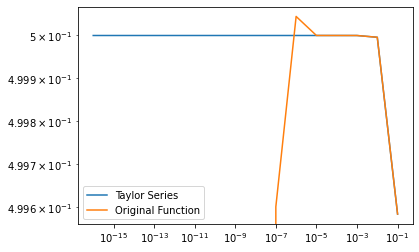

In [13]:
plt.loglog(x, taylor)
plt.loglog(x, f_list)
plt.legend(["Taylor Series","Original Function"])
plt.show()

In [14]:
data = []
for i in range(len(x)):
    data.append([x[i], taylor[i], f_list[i]])
    
print ("{:<10} {:<25} {:<25}".format('x','Taylor Series', 'Original Function'))

for i in data:
    temp1, temp2, temp3 = i
    print ("{:<10} {:<25} {:<25}".format(temp1,temp2,temp3))

x          Taylor Series             Original Function        
0.1        0.4995833333333333        0.49958347219741783      
0.01       0.4999958333333333        0.4999958333473664       
0.001      0.4999999583333333        0.49999995832550326      
0.0001     0.49999999958333335       0.4999999969612645       
1e-05      0.49999999999583333       0.5000000413701854       
1e-06      0.4999999999999583        0.5000444502911705       
1e-07      0.49999999999999956       0.4996003610813205       
1e-08      0.5                       0.0                      
1e-09      0.5                       0.0                      
1e-10      0.5                       0.0                      
1e-11      0.5                       0.0                      
1e-12      0.5                       0.0                      
1e-13      0.5                       0.0                      
1e-14      0.5                       0.0                      
1e-15      0.5                       0.0               

## (d)
Discuss the differences between the result of (b) and (c). Which results do you believe are more accurate? In case you find that the results of (c) are not accurate, propose an alternative formula and redo question (c) using this new formula. 

The difference between the results of (b) and (c) is that after $10^{-8}$, the orginal function goes to zero whilst the Taylor series approximation goes to $0.5$. Because of this, we believe the results of the approximation to be more accurate as the when taking the limit to 0, the result is indeed $0.5$. The reason for this is because the $1/x^{2}$ blows up for small values of $x$ which creates errors.


Recall the following trigonometric identity:

$1-\cos(x) = 2 \sin^2(\frac{x}{2})$

Substitute into the original equation:

$\frac{2\sin^2(\frac{x}{2})}{x^2}$

In [15]:
def fx(x):
    return 2*math.sin(x/2)**2 / x**2

In [16]:
fx_list = []

for i in range (1,17):
    print(fx(10**-i))
    fx_list.append(fx(10**-i))

0.49958347219742333
0.49999583334722214
0.4999999583333347
0.4999999995833334
0.4999999999958333
0.4999999999999583
0.4999999999999996
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5


In [17]:
data = []
for i in range(len(x)):
    data.append([x[i], fx_list[i], f_list[i]])
    
print ("{:<10} {:<25} {:<25}".format('x','Rewritten Function', 'Original Function'))

for i in data:
    temp1, temp2, temp3 = i
    print ("{:<10} {:<25} {:<25}".format(temp1,temp2,temp3))

x          Rewritten Function        Original Function        
0.1        0.49958347219742333       0.49958347219741783      
0.01       0.49999583334722214       0.4999958333473664       
0.001      0.4999999583333347        0.49999995832550326      
0.0001     0.4999999995833334        0.4999999969612645       
1e-05      0.4999999999958333        0.5000000413701854       
1e-06      0.4999999999999583        0.5000444502911705       
1e-07      0.4999999999999996        0.4996003610813205       
1e-08      0.5                       0.0                      
1e-09      0.5                       0.0                      
1e-10      0.5                       0.0                      
1e-11      0.5                       0.0                      
1e-12      0.5                       0.0                      
1e-13      0.5                       0.0                      
1e-14      0.5                       0.0                      
1e-15      0.5                       0.0               